https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

In [55]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [57]:
pd.set_option('display.max_columns', None) # this helps us see and analyze all the columns using the head function in pandas
data = pd.read_csv("/gdrive/MyDrive/data folder/Car Predictions Dataset/CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Cleaning Data

Our first step is toi see the data itself with all the imporstnat information such as mean, std and min max values. 

In [58]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


It is seens that there are equal number of distribution of data (205) data points in each column. It can be seen that there are no Zero values in the min section of the data but its safe to see and check if there are any NAN or null values in the column

In [59]:
# Droping columns that arent needed
columns_to_drop = ['car_ID', 'symboling']
df = data.drop(columns_to_drop, axis=1)
df = df.copy()
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [60]:
#finding missing values
df.isna().mean()

CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

We need to see the distribution of which variables are integer or float while which ones are categorical aka strings

In [61]:
df.dtypes

CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [62]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

As you can see there are so many different types of cars but the unique part about exploring this is that the first word is usually the brand name of the vechicle and its is import to extract that information

In [63]:
df['CarCompany'] = df['CarName'].str.split().str[0]
df_copy= df.copy()

In [64]:
print(df_copy['CarCompany'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [65]:
df_copy.head(5)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


It can be seen that the dataset has a couple of misspeeled vechicle names. We also need to drop the other 'CarNames' Columns as it is not important?

In [66]:
columns_to_drop = ['CarName']
df = df_copy.drop(columns_to_drop, axis=1)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [67]:
df['CarCompany'] = df['CarCompany'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [68]:
print(df['CarCompany'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


Now that we have completely taken care of the dataset itself, it is know that we have two types of data in the column, one being float and the other being object. We need to know and split the columns into categorical and numerical columns for easier use

In [69]:
categorical_col = df.select_dtypes(include=['object']).columns
numerical_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[categorical_col]
df_num = df[numerical_col]
print("Categorical columns = ", categorical_col)
print("Numerical columns = ", numerical_col)

Categorical columns =  Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CarCompany'],
      dtype='object')
Numerical columns =  Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


In [70]:
df.to_csv('/gdrive/MyDrive/data folder/Car Predictions Dataset/CarPrice_Assignment_edited.csv', index=False)

# **Data Visualization**

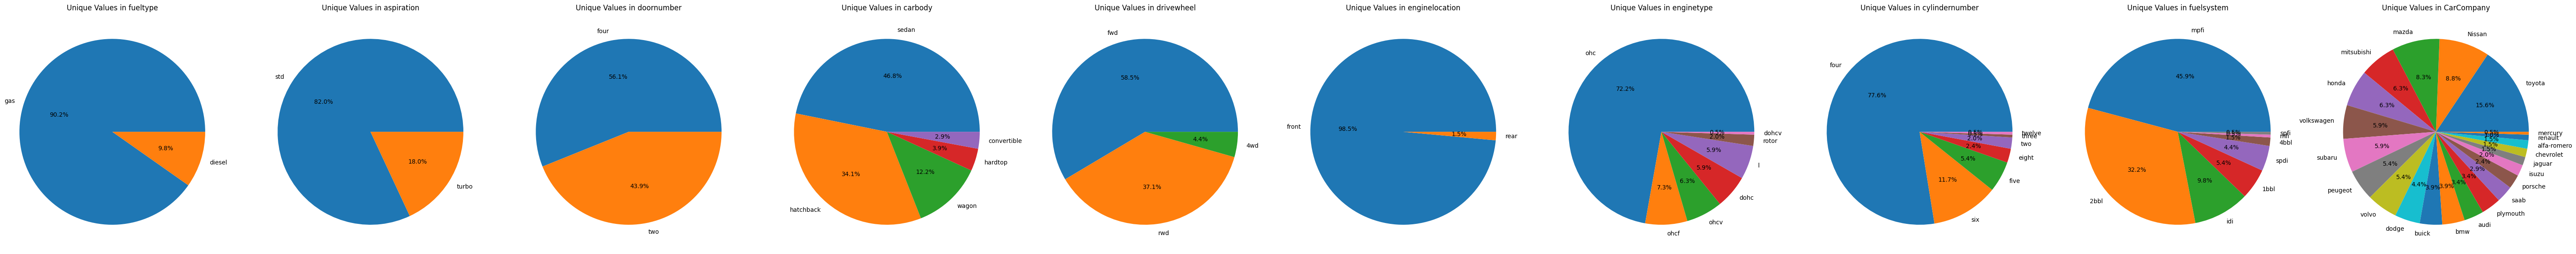

In [71]:
#Representation of categorical data using Pie charts

columns = ['fueltype','aspiration','doornumber', 'carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
# Set up subplots
num_columns = len(categorical_col)
fig, axes = plt.subplots(1, num_columns, figsize=(6 * num_columns, 6))

# Generate pie charts for each column
for i, column in enumerate(categorical_col):
    # Count unique values in the column
    column_counts = df[column].value_counts()

    # Plotting a pie chart
    axes[i].pie(column_counts, labels=column_counts.index, autopct='%1.1f%%')
    axes[i].set_title(f'Unique Values in {column}')
    axes[i].axis('equal')

# Adjust spacing between subplots
plt.tight_layout()

# Display the pie charts
plt.show()

Categorical data analysis from the above pie charts are the follow:


1.   Fuel Type: There are only 2 types of fuel data, gas and desiel with gas being 90% of the share
2.   Arpiration: Two unique values, with Standard aspiration being 90% of the cars in the dataset
3. Door Number: There is almost an equal number of both 4 door and 2 door vechicles
4. Car Body: It can be seen that Sedans and Hatchbacks dominate the dataset with 80% of the vechicles
*For car body we need to also remeber that there is no body type named SUV, it could be that they have taken it in account with the team Wagon or if Wagon was mean to be SUV*

5. Drive Wheel: FWD and RWD domainate this with 95% of the vechicles
*4WD are usually found in SUV and Trucks which could imply that they are found in the 12% of the Wagon distribution*

6. Engine Location and Type: Most common type of engine positioning is in the front with the most common engine type being OHC
7. Cylinders: 4 and ^ cylinders contribute to almost 90% of the vechicles



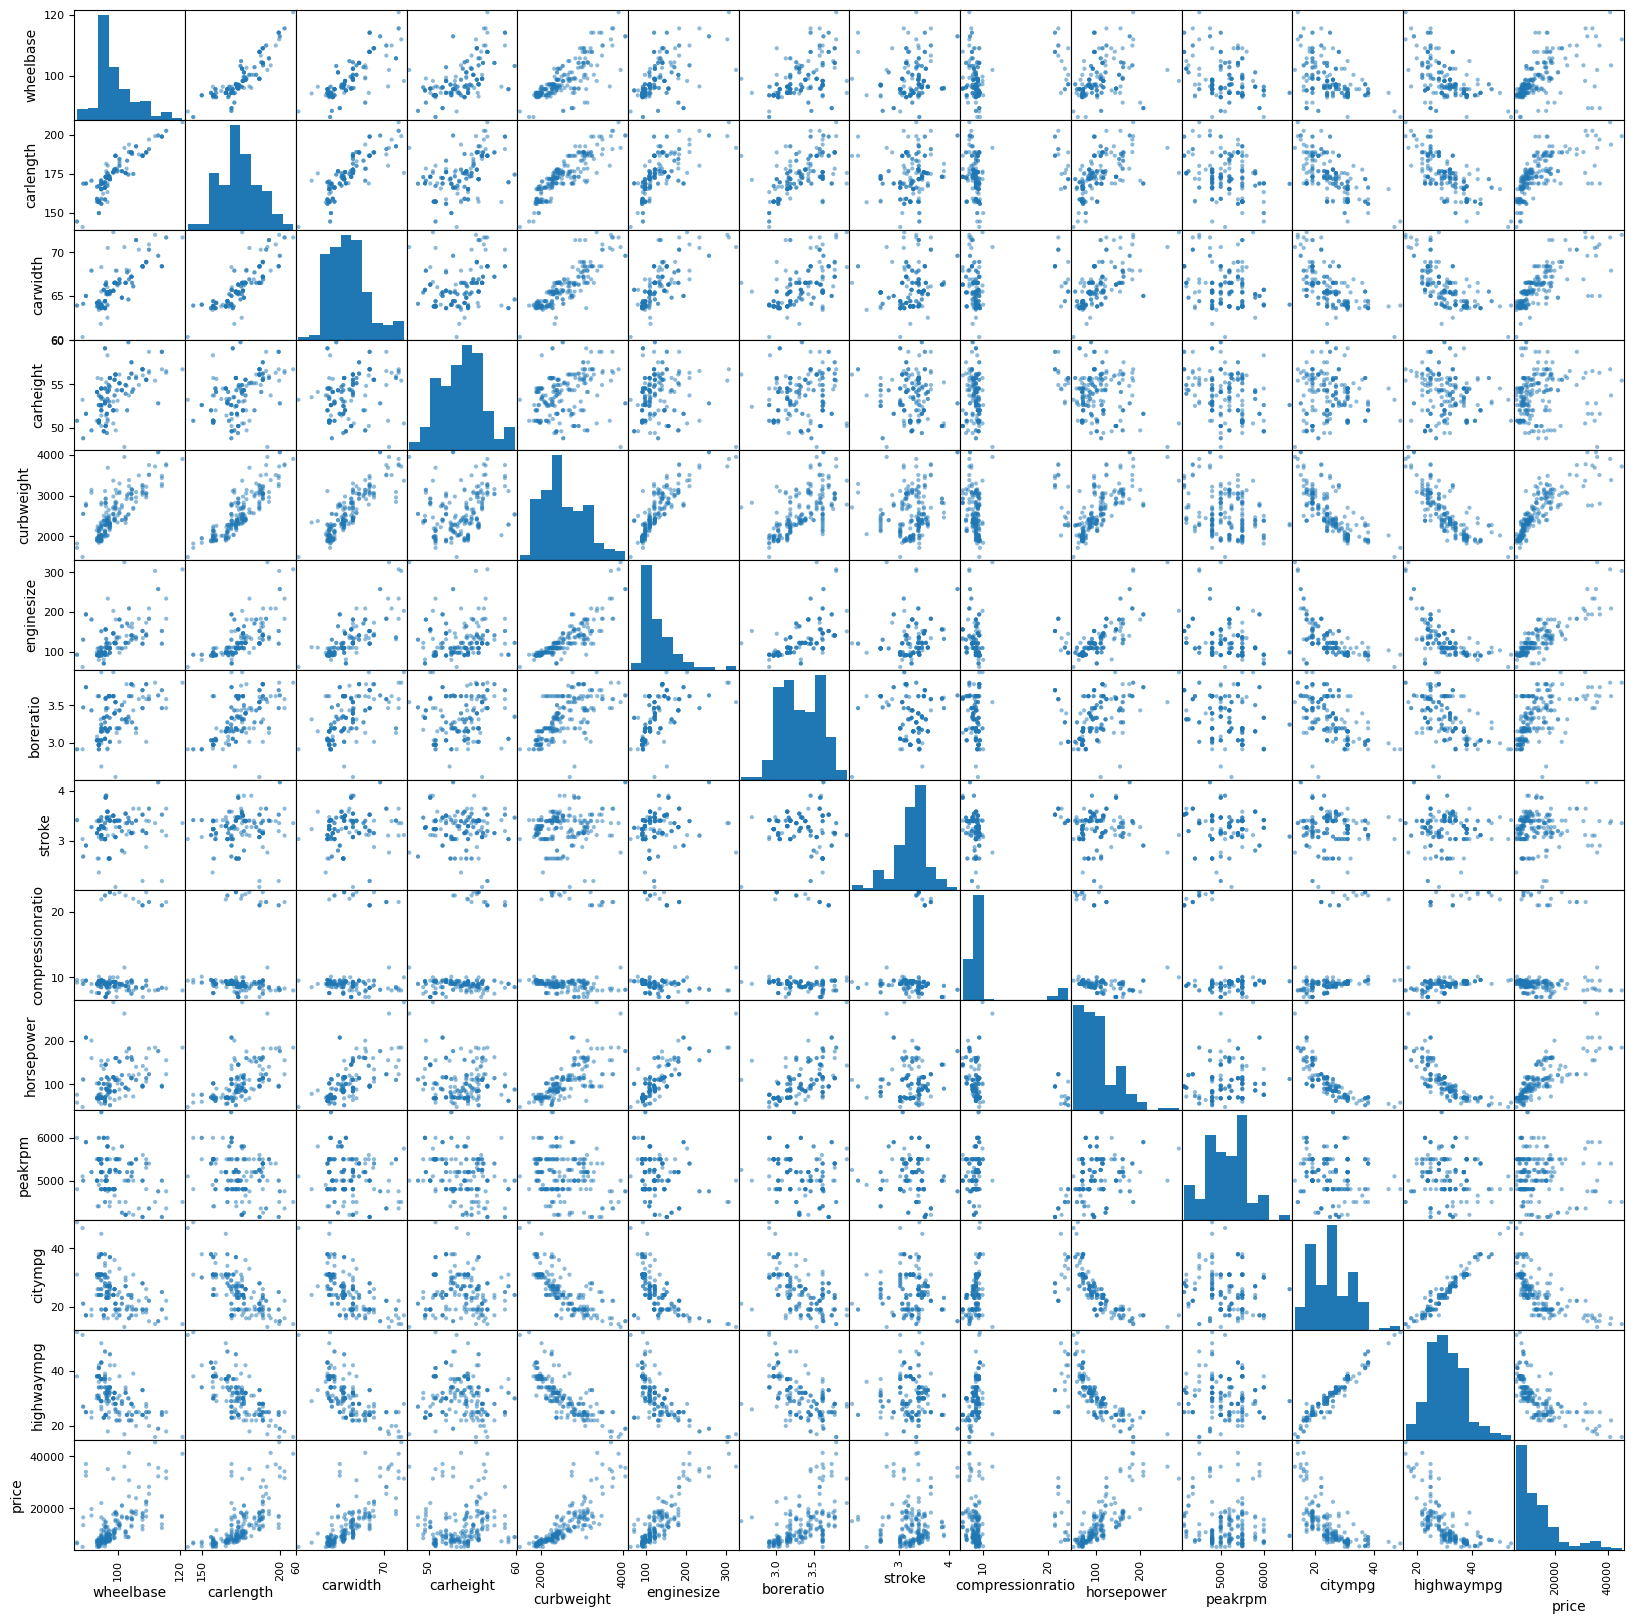

In [72]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[numerical_col], figsize=(20,20))
plt.show()

Our predicting value is Price. We need to find all variables that have an influence on price. 

1.   WheelBase, Carlength, CarWidth, CarHeight, CurbWeight, EngineSize, Boreration, HorsePower -> Positive Correlation
2.   CityMpg, HighwayMpg -> Negative Correlation
3. Peakrpm and compressionration do not effect price



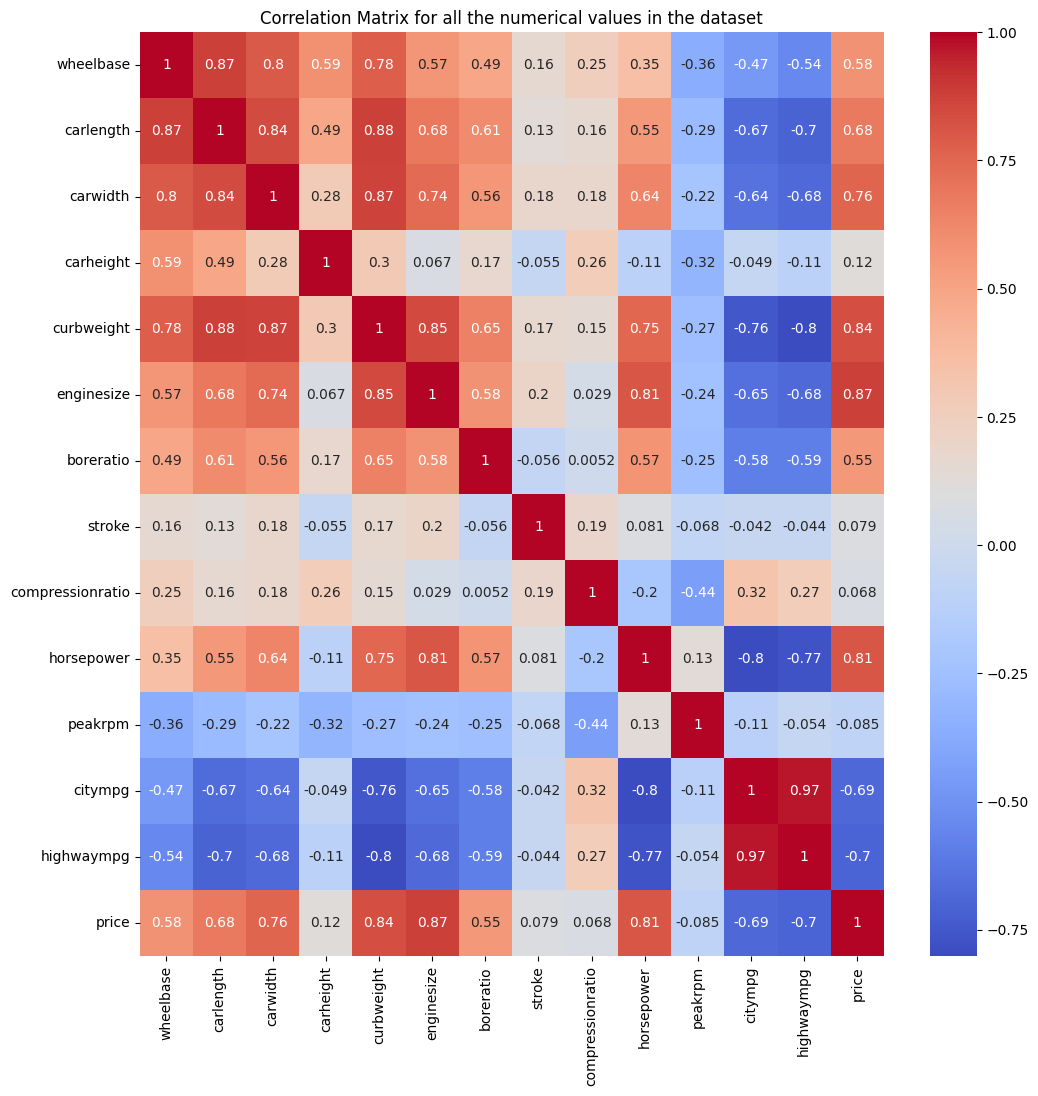

In [73]:
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Customize plot
plt.title('Correlation Matrix for all the numerical values in the dataset')

plt.show()

The above matrix relation showcases how each feature is correlated with the other. The closer to 1 means it is a strong positive correlation and if below it is a negative correlation. 

From our previous assumption we can confirm that curbweight, enginesize and horsepower are the strongest postive correlated variables while we can also look at carwidth as well. 

For citympg and and highwaympg it can bee seen that there is a strong negative correlation with price.

Text(0, 0.5, 'Count of Cars')

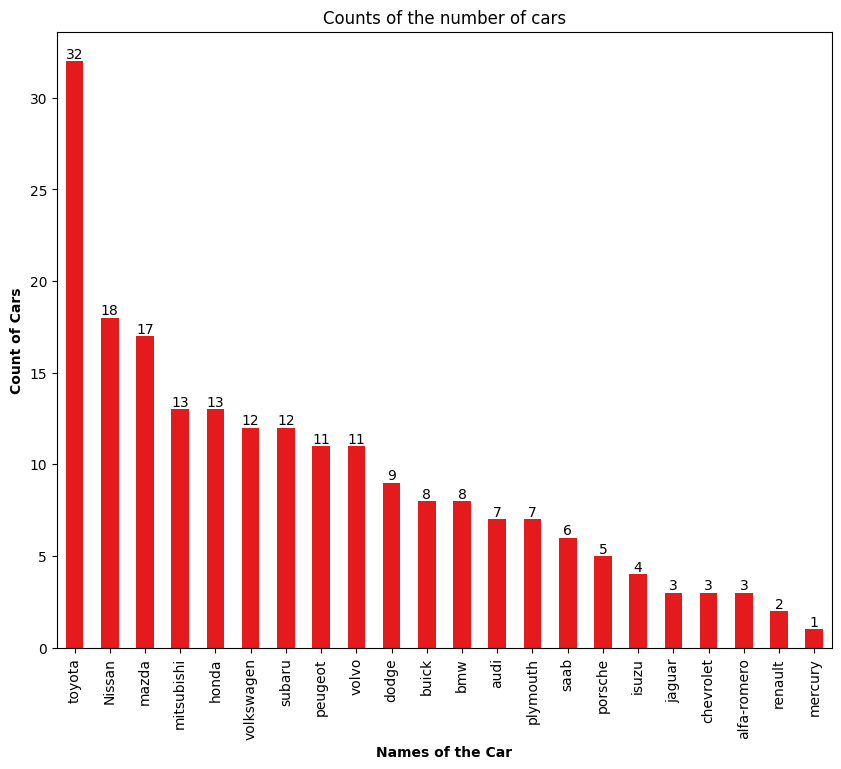

In [74]:
plt.figure(figsize=(10,8))
ax=df['CarCompany'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
for i, count in enumerate(df['CarCompany'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')
ax.title.set_text('Counts of the number of cars')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

Toyota is the highest selling car in the dataset along with Nissan and Mazda. 

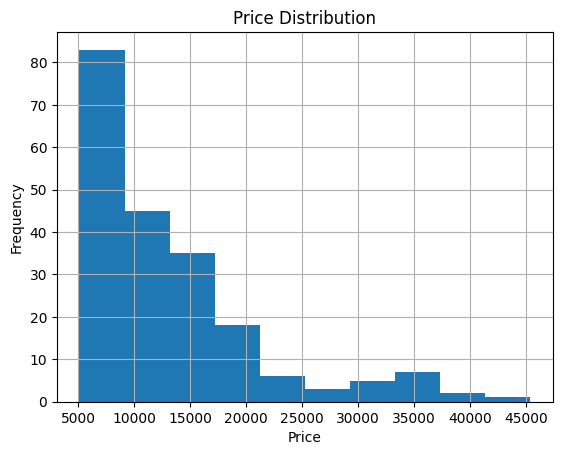

In [75]:
#Try using Displot 
df['price'].plot.hist(grid=True)

# Customize plot
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')

# Show the plot
plt.show()

It is seen that most of the vechicles are in the price range of 5,000 to 20,000 dollars

<Axes: xlabel='CarCompany', ylabel='price'>

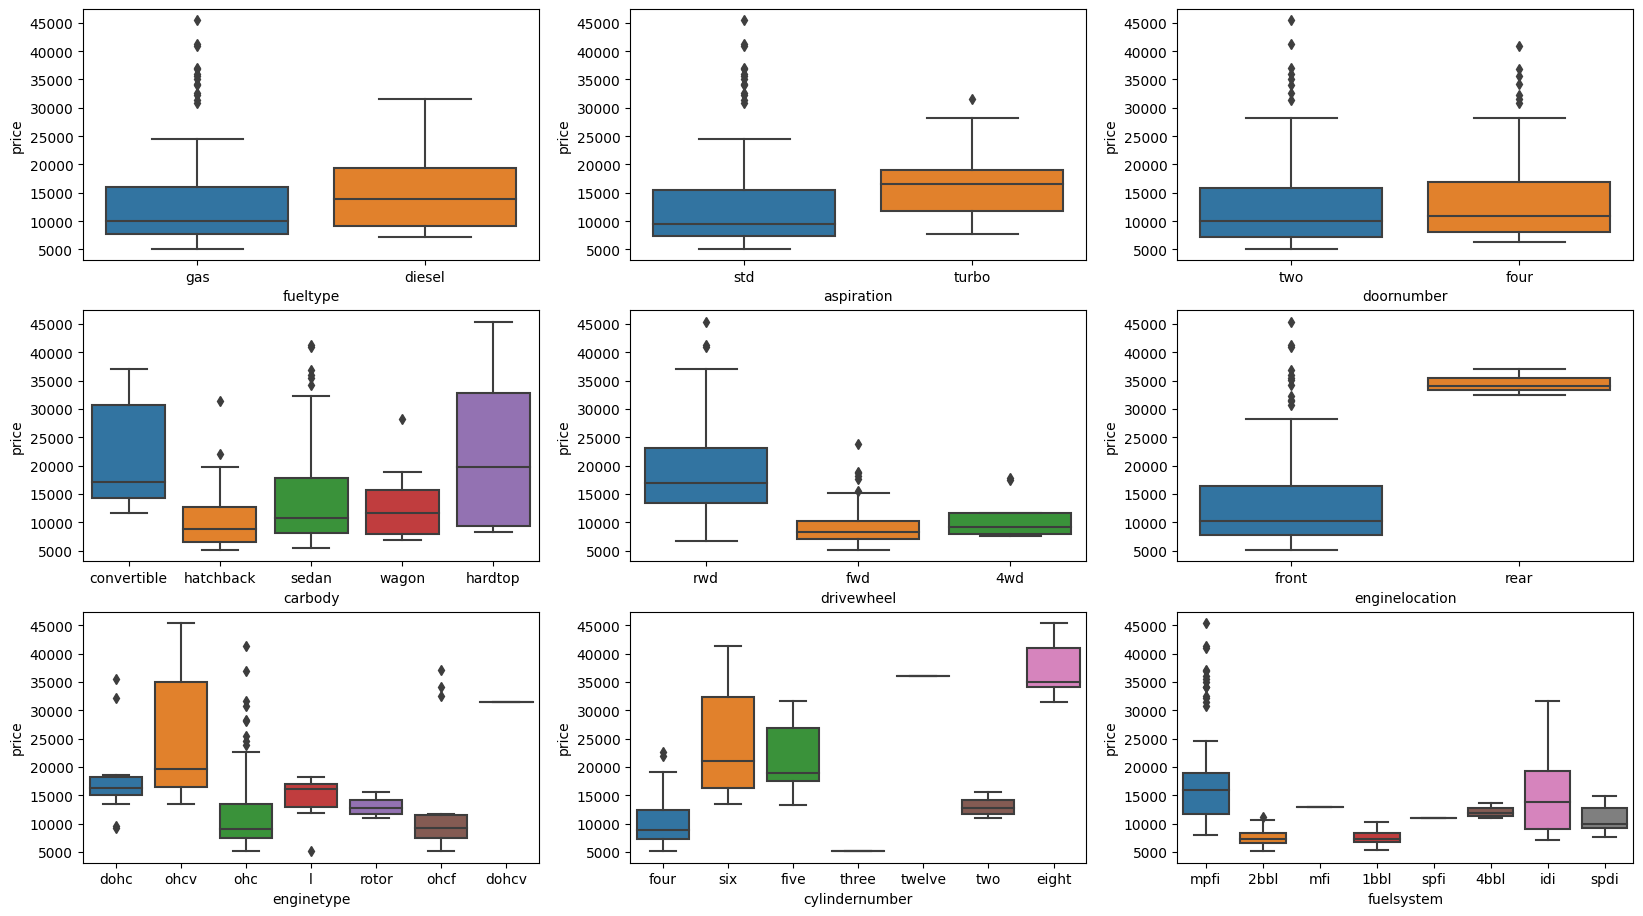

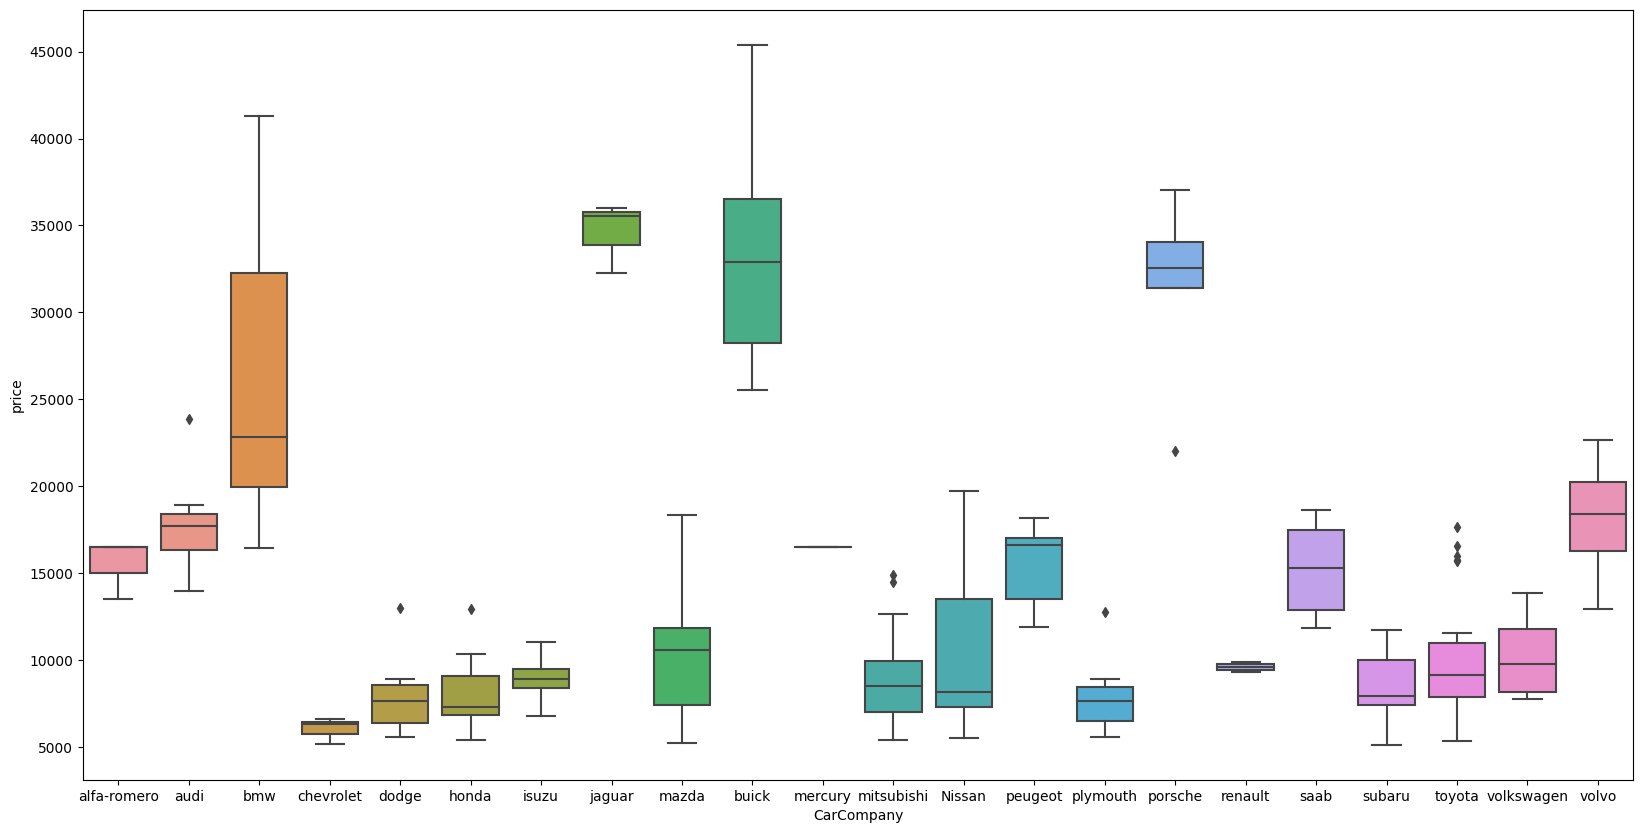

In [76]:
plt.figure(figsize=(20,15))
plt.subplot(4,3,1)
sns.boxplot(x='fueltype', y='price', data=df)
plt.subplot(4,3,2)
sns.boxplot(x='aspiration', y='price', data=df)
plt.subplot(4,3,3)
sns.boxplot(x='doornumber', y='price', data=df)
plt.subplot(4,3,4)
sns.boxplot(x='carbody', y='price', data=df)
plt.subplot(4,3,5)
sns.boxplot(x='drivewheel', y='price', data=df)
plt.subplot(4,3,6)
sns.boxplot(x='enginelocation', y='price', data=df)
plt.subplot(4,3,7)
sns.boxplot(x='enginetype', y='price', data=df)
plt.subplot(4,3,8)
sns.boxplot(x='cylindernumber', y='price', data=df)
plt.subplot(4,3,9)
sns.boxplot(x='fuelsystem', y='price', data=df)

plt.figure(figsize=(20,10))
sns.boxplot(x='CarCompany', y='price', data=df)

**Boxplot is a really important and useful tool in representing categorical data with respect to nurmerical data.**

*It is important to note that box plot shocases the distribution of the data for each unique category of each coloumn with respect to price. The diamond dots showcases the outliers of the data in its repective value.* 

**Some Analysis:**

1. The most expensive fuetype is Disel but petrol has more outliers in its domain along with more number of vechicles in the dataset ( Feom the pie chart)

2. The standard engine is more selling and has the highest expense but at the same time the average cost for a turbo is higher even though they sell lesser. But clearly the number of doors in a vechicle does not really effect price as they are both distributed equally.

3. Hardtop vechicles have more range in their prices but usually the cheapest vechicles are the sedans, hachbacks and wagons. The most expensive type is usually convertiable

4. RWD vechicles are the most prominant with a verstile range for price and its expected to see that most vechicles you buy in that price range should have engine in the front and they are generally more expensive

5. Cylindernumber clearly has an influence on the price. More number of cyclines imply that the range of price for the vechicle increase.

6. The last graph showcases the distribution of prices for a compan for its vechicles

### **So we are finally going to extract only the most important columns as features for prediction for our linear model**

the main features that are going to be taken under consideration are:

'CarCompany','enginetype', 'fueltype', 'carbody' , 'aspiration' , 'cylindernumber','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price'


Steps to implement:
1. we need to do univarite regression.
2. we do multivaraite regression
3. we will try using all the columns for regression
4. we will implement label encoding and regression
5. we will implement onehotencoding with regression
6. we will do stand scalar and one hot encoding with regression
7. we will do one hot encoding, standard scalar and feature selection using RFE for regression

# Univariate Regression


In [77]:
pd.set_option('display.max_columns', None) # this helps us see and analyze all the columns using the head function in pandas
data = pd.read_csv("/gdrive/MyDrive/data folder/Car Predictions Dataset/CarPrice_Assignment_edited.csv")

In [78]:
# we will use the most correlated value aka engine size
column = ['enginesize']
univarite_dataset = data[column]
univarite_y = data['price']

# splitting
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(univarite_dataset, univarite_y, test_size=0.3)

# model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

# Make predictions on the test set
y_pred1 = model1.predict(X_test1)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse1 = mean_squared_error(y_test1, y_pred1)
rmse1 = mse1 ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse1}")
r2_1 = r2_score(y_test1, y_pred1)
print(f"R2 score value is {r2_1}")


# Optionally, you can also access the coefficients and intercept of the model
coefficients1 = model1.coef_
intercept1 = model1.intercept_
print("Coefficients:", coefficients1)
print("Intercept:", intercept1)


Root Mean Squared Error (RMSE): 3121.7098813852062
R2 score value is 0.7636578337950584
Coefficients: [166.19378161]
Intercept: -7524.218127252883


# Multivarate Regression

In [79]:
pd.set_option('display.max_columns', None) # this helps us see and analyze all the columns using the head function in pandas
data = pd.read_csv("/gdrive/MyDrive/data folder/Car Predictions Dataset/CarPrice_Assignment_edited.csv")

In [80]:
# we will use the 3 most correlated value aka engine size
column = ['enginesize','curbweight', 'horsepower']
multivaiate_dataset = data[column]
multivariate_y = data['price']

# splitting
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(multivaiate_dataset, multivariate_y, test_size=0.3)

# model
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

# Make predictions on the test set
y_pred2 = model2.predict(X_test2)

# Evaluate the model
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = mse2 ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse2}")
r2_2 = r2_score(y_test2, y_pred2)
print(f"R2 score value is {r2_2}")


# Optionally, you can also access the coefficients and intercept of the model
coefficients2 = model2.coef_
intercept2 = model2.intercept_
print("Coefficients:", coefficients2)
print("Intercept:", intercept2)

Root Mean Squared Error (RMSE): 3770.052337089381
R2 score value is 0.8019112712723224
Coefficients: [85.48786408  4.69845553 33.11877185]
Intercept: -13181.43552947587


# Using all the Numerical Columns

In [81]:
pd.set_option('display.max_columns', None) # this helps us see and analyze all the columns using the head function in pandas
data = pd.read_csv("/gdrive/MyDrive/data folder/Car Predictions Dataset/CarPrice_Assignment_edited.csv")

In [82]:
# we will use the 3 most correlated value aka engine size
column = ['enginesize','curbweight', 'horsepower', 'wheelbase',	'carlength',	'carwidth',	'carheight',	'peakrpm',	'highwaympg']
numerical_dataset = data[column]
y = data['price']

# splitting
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(numerical_dataset, y, test_size=0.3)

# model
from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(X_train3, y_train3)

# Make predictions on the test set
y_pred3 = model3.predict(X_test3)

# Evaluate the model
mse3 = mean_squared_error(y_test3, y_pred3)
rmse3 = mse3 ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse3}")
r2_3 = r2_score(y_test3, y_pred3)
print(f"R2 score value is {r2_3}")


# Optionally, you can also access the coefficients and intercept of the model
coefficients3 = model3.coef_
intercept3 = model3.intercept_
print("Coefficients:", coefficients3)
print("Intercept:", intercept3)

Root Mean Squared Error (RMSE): 3386.8914278595435
R2 score value is 0.7585010581055545
Coefficients: [ 98.72114525   3.92891662  62.77687809 -57.26865354 -84.91347831
 779.91317438 295.56253307   1.44461596 130.93857808]
Intercept: -73819.14873062105


Clearly that put the R2 score of our model below and hence clearly using all the features does not mean improvement in the model.

#Label encoding and regression

In [83]:
pd.set_option('display.max_columns', None) # this helps us see and analyze all the columns using the head function in pandas
data = pd.read_csv("/gdrive/MyDrive/data folder/Car Predictions Dataset/CarPrice_Assignment_edited.csv")

In [84]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


columns = ['wheelbase',	'carlength',	'carwidth',	'carheight',	'curbweight',	'enginesize',	'horsepower',	'peakrpm',	'highwaympg','cylindernumber','fuelsystem','carbody']
label_encoding_dataset = data[columns]
Y = data['price']
label_encoder = LabelEncoder()
label_encoding_dataset['cylindernumber_encoded'] = label_encoder.fit_transform(label_encoding_dataset[['cylindernumber']])
label_encoding_dataset['fuelsystem_encoded'] = label_encoder.fit_transform(label_encoding_dataset[['fuelsystem']])
label_encoding_dataset['carbody_encoded'] = label_encoder.fit_transform(label_encoding_dataset[['carbody']])
label_encoding_dataset = label_encoding_dataset.drop(['cylindernumber'],axis=1)
label_encoding_dataset = label_encoding_dataset.drop(['fuelsystem'],axis=1)
label_encoding_dataset = label_encoding_dataset.drop(['carbody'],axis=1)


#splitting the data
X_train4, X_test4, y_train4, y_test4 =train_test_split(label_encoding_dataset,Y,  test_size = 0.3)

#model
model4 = LinearRegression()
model4.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred4 = model4.predict(X_test4)

# Evaluate the model
mse4 = mean_squared_error(y_test4, y_pred4)
rmse4 = mse4 ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse4}")
r2_4 = r2_score(y_test4, y_pred4)
print(f"R2 score value is {r2_4}")


# Optionally, you can also access the coefficients and intercept of the model
coefficients4 = model4.coef_
intercept4 = model4.intercept_
print("Coefficients:", coefficients4)
print("Intercept:", intercept4)

Root Mean Squared Error (RMSE): 3308.976822865519
R2 score value is 0.7483368474176224
Coefficients: [  -53.42909448   -27.13645599   965.28948885   511.3264873
     3.4141371    105.48729081    21.75836681     2.32518594
    44.55005127   691.79670127  -164.51589625 -1187.0145111 ]
Intercept: -103324.13600068557


we know that clearly using all the features would not give us the exactly measure. hence We are going to choose 5 Numerical and 3 Categorical features That we think saw had the best correlation and then use label encoding, one hot encodding and finally Standscalar encoding with onehotencoding. And then lastly use RFE. 

onehotencoding

In [85]:
pd.set_option('display.max_columns', None) # this helps us see and analyze all the columns using the head function in pandas
data = pd.read_csv("/gdrive/MyDrive/data folder/Car Predictions Dataset/CarPrice_Assignment_edited.csv")
all_col = ['CarCompany','enginetype', 'fueltype', 'carbody' , 'aspiration' , 'cylindernumber','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
data = data[all_col]

In [86]:
Numerical_Columns = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
Categorical_Columns = ['CarCompany','enginetype', 'fueltype', 'carbody' , 'aspiration' , 'cylindernumber']

In [87]:
dummies = pd.get_dummies(data[Categorical_Columns])
dummies = pd.get_dummies(data[Categorical_Columns], drop_first = True)
final_dataset = pd.concat([data, dummies], axis = 1)
final_dataset.drop( Categorical_Columns, axis = 1, inplace = True)
y = final_dataset['price']
final_dataset=final_dataset.drop(['price'], axis=1)
#splitting of data
X_train5, X_test5, y_train5, y_test5 =train_test_split(final_dataset,y,  test_size = 0.3)


model5 = LinearRegression()
model5.fit(X_train5, y_train5)

# Make predictions on the test set
y_pred5 = model5.predict(X_test5)

# Evaluate the model
mse5 = mean_squared_error(y_test5, y_pred5)
rmse5 = mse5 ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse5}")
r2_5 = r2_score(y_test5, y_pred5)
print(f"R2 score value is {r2_5}")

Root Mean Squared Error (RMSE): 2253.269271566962
R2 score value is 0.9110632398947649


onehotencoding and standard scalar

In [88]:
from sklearn.preprocessing import StandardScaler

In [106]:
pd.set_option('display.max_columns', None) # this helps us see and analyze all the columns using the head function in pandas
data = pd.read_csv("/gdrive/MyDrive/data folder/Car Predictions Dataset/CarPrice_Assignment_edited.csv")
all_col = ['CarCompany','enginetype', 'fueltype', 'carbody' , 'aspiration' , 'cylindernumber','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
data = data[all_col]

In [107]:
Numerical_Columns = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
Categorical_Columns = ['CarCompany','enginetype', 'fueltype', 'carbody' , 'aspiration' , 'cylindernumber']

In [110]:
dummies = pd.get_dummies(data[Categorical_Columns])
dummies = pd.get_dummies(data[Categorical_Columns], drop_first = True)
final_dataset = pd.concat([data, dummies], axis = 1)
final_dataset.drop( Categorical_Columns, axis = 1, inplace = True)
scaler = StandardScaler()
final_dataset[Numerical_Columns] = scaler.fit_transform(final_dataset[Numerical_Columns])
y = final_dataset['price']
final_dataset=final_dataset.drop(['price'], axis=1)
#splitting of data
X_train6, X_test6, y_train6, y_test6 =train_test_split(final_dataset, y,  test_size = 0.3)


model6 = LinearRegression()
model6.fit(X_train6, y_train6)

# Make predictions on the test set
y_pred6 = model6.predict(X_test6)

# Evaluate the model
mse6 = mean_squared_error(y_test6, y_pred6)
rmse6 = mse6 ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse6}")
r2_6 = r2_score(y_test6, y_pred6)
print(f"R2 score value is {r2_6}")

Root Mean Squared Error (RMSE): 0.3426131892376044
R2 score value is 0.881124610072186


RFE


In [111]:
from sklearn.feature_selection import RFE

In [112]:
pd.set_option('display.max_columns', None) # this helps us see and analyze all the columns using the head function in pandas
data = pd.read_csv("/gdrive/MyDrive/data folder/Car Predictions Dataset/CarPrice_Assignment_edited.csv")
all_col = ['CarCompany','enginetype', 'fueltype', 'carbody' , 'aspiration' , 'cylindernumber','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
data = data[all_col]

In [113]:
Numerical_Columns = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
Categorical_Columns = ['CarCompany','enginetype', 'fueltype', 'carbody' , 'aspiration' , 'cylindernumber']

In [114]:
dummies = pd.get_dummies(data[Categorical_Columns])
dummies = pd.get_dummies(data[Categorical_Columns], drop_first = True)
final_dataset = pd.concat([data, dummies], axis = 1)
final_dataset.drop( Categorical_Columns, axis = 1, inplace = True)
scaler = StandardScaler()
final_dataset[Numerical_Columns] = scaler.fit_transform(final_dataset[Numerical_Columns])
y = final_dataset['price']
final_dataset=final_dataset.drop(['price'], axis=1)

In [115]:
model7 = LinearRegression()
rfe = RFE(model7, n_features_to_select=10)  # Specify the number of features to select

# Fit RFE on the dataset
rfe.fit(final_dataset, y)

# Get the selected features
selected_features = final_dataset.columns[rfe.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['curbweight', 'CarCompany_alfa-romero', 'CarCompany_audi',
       'CarCompany_bmw', 'CarCompany_buick', 'CarCompany_jaguar',
       'CarCompany_porsche', 'CarCompany_subaru', 'enginetype_ohcf',
       'cylindernumber_five'],
      dtype='object')


In [116]:
dataset = final_dataset[selected_features]
X_train7, X_test7, y_train7, y_test7 =train_test_split(dataset, y,  test_size = 0.3)


model7 = LinearRegression()
model7.fit(X_train7, y_train7)

# Make predictions on the test set
y_pred7 = model7.predict(X_test7)

# Evaluate the model
mse7 = mean_squared_error(y_test7, y_pred7)
rmse7 = mse7 ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse7}")
r2_7 = r2_score(y_test7, y_pred7)
print(f"R2 score value is {r2_7}")

Root Mean Squared Error (RMSE): 0.336248441732931
R2 score value is 0.860968323789179


Text(0, 0.5, 'y_pred')

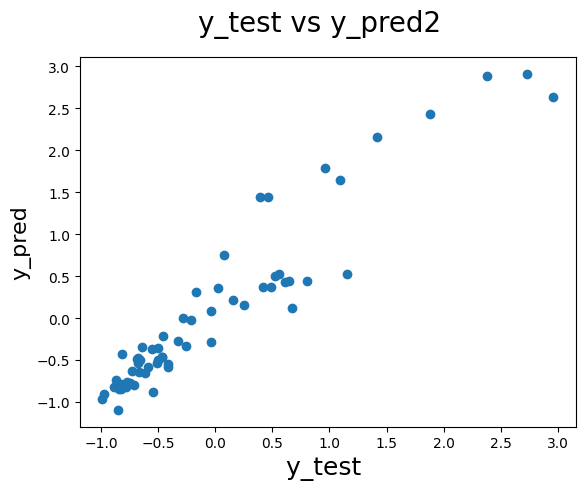

In [117]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test7,y_pred7)
fig.suptitle('y_test vs y_pred2', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)   

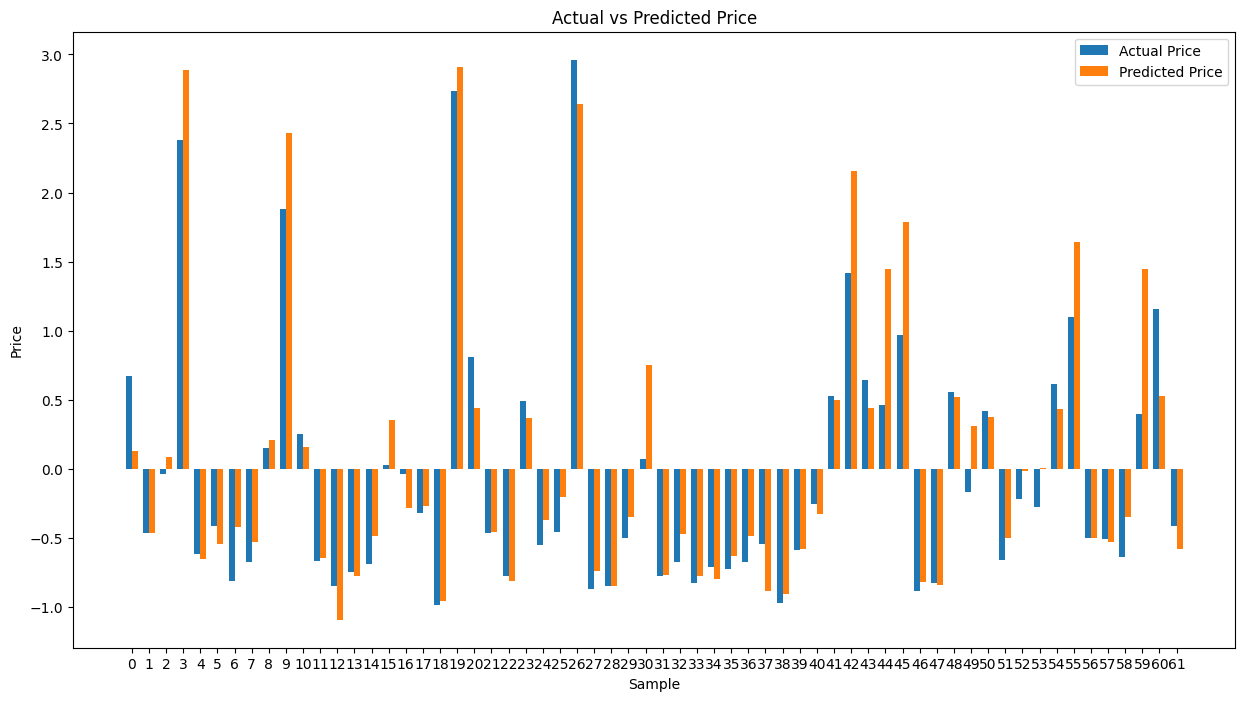

In [118]:
import matplotlib.pyplot as plt
import numpy as np



# Calculate the number of samples
num_samples = len(y_test7)

# Generate an array of indices for the x-axis
x_indices = np.arange(num_samples)

# Set the width of the bars
bar_width = 0.35

plt.figure(figsize=(15,8))

# Plot the actual prices
plt.bar(x_indices, y_test7, width=bar_width, label='Actual Price')

# Plot the predicted prices
plt.bar(x_indices + bar_width, y_pred7, width=bar_width, label='Predicted Price')

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()

# Adjust the x-axis ticks
plt.xticks(x_indices + bar_width / 2, x_indices)

# Show the plot
plt.show()


I noticed that the specific vechicle brands are being taken out as key values of car pricing which isnt really need and might need to change that value with something else.


In [119]:
pd.set_option('display.max_columns', None) # this helps us see and analyze all the columns using the head function in pandas
data = pd.read_csv("/gdrive/MyDrive/data folder/Car Predictions Dataset/CarPrice_Assignment_edited.csv")
all_col = ['CarCompany','enginetype', 'fueltype', 'carbody' , 'aspiration' , 'cylindernumber','wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
data = data[all_col]

Text(0, 0.5, 'Count of Cars')

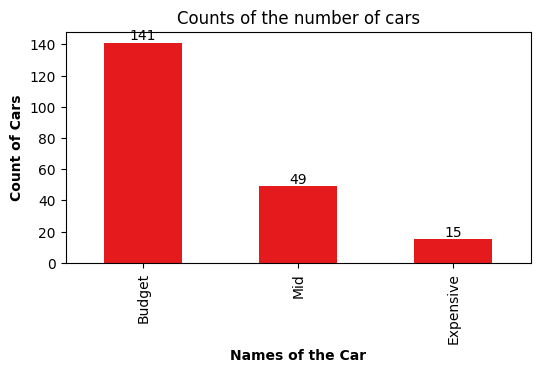

In [120]:
car_price_range = ['Budget', 'Mid', 'Expensive']
for i in range(len(data)):
    if data['price'][i] < 15000.0:
        data.loc[i, 'car_price_range'] = 'Budget'
    elif 15000.0 <= data['price'][i] <= 30000.0:
        data.loc[i, 'car_price_range'] = 'Mid'
    elif data['price'][i] > 30000.0:
        data.loc[i, 'car_price_range'] = 'Expensive'
data.drop(['CarCompany'], axis = 1, inplace = True)
plt.figure(figsize=(6,3))
ax=data['car_price_range'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
for i, count in enumerate(data['car_price_range'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')
ax.title.set_text('Counts of the number of cars')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')


In [121]:
Numerical_Columns = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']
Categorical_Columns = ['car_price_range','enginetype', 'fueltype', 'carbody' , 'aspiration' , 'cylindernumber']


In [122]:
dummies = pd.get_dummies(data[Categorical_Columns])
dummies = pd.get_dummies(data[Categorical_Columns], drop_first = True)
final_dataset = pd.concat([data, dummies], axis = 1)
final_dataset.drop( Categorical_Columns, axis = 1, inplace = True)
scaler = StandardScaler()
final_dataset[Numerical_Columns] = scaler.fit_transform(final_dataset[Numerical_Columns])
y = final_dataset['price']
final_dataset=final_dataset.drop(['price'], axis=1)
final_dataset.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,car_price_range_Expensive,car_price_range_Mid,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [123]:
model8 = LinearRegression()
rfe1 = RFE(model8, n_features_to_select=5) 
# Fit RFE on the dataset
rfe1.fit(final_dataset, y)

# Get the selected features
selected_features1 = final_dataset.columns[rfe1.support_]

# Print the selected features
print("Selected Features:")
print(selected_features1)


Selected Features:
Index(['curbweight', 'car_price_range_Expensive', 'car_price_range_Mid',
       'enginetype_dohcv', 'cylindernumber_twelve'],
      dtype='object')


In [126]:
dataset = final_dataset[selected_features1]
X_train8, X_test8, y_train8, y_test8 =train_test_split(dataset, y,  test_size = 0.3)


model8 = LinearRegression()
model8.fit(X_train8, y_train8)

# Make predictions on the test set
y_pred8 = model8.predict(X_test8)

# Evaluate the model
mse8 = mean_squared_error(y_test8, y_pred8)
rmse8 = mse8 ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse8}")
r2_8 = r2_score(y_test8, y_pred8)
print(f"R2 score value is {r2_8}")

Root Mean Squared Error (RMSE): 0.22873979138441927
R2 score value is 0.9498511502742423
